# Завдання на використання SQL в Python

1.Встановіть бібліотеку `mysql-connector-python` через pip aбо через conda.

In [1]:
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 19.7 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime

2.В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робилось в лекції:

In [18]:
con = mysql.connector.connect(user='root', password='12345678', host='127.0.0.1', database='employees')

3.Виберіть максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Аби отримати результати в кінці, виконайте `cursor.fetchall()`.

In [19]:
cursor = con.cursor()

In [23]:
sql = """
SELECT max(hire_date), min(hire_date)
FROM employees
"""

In [24]:
cursor.execute(sql)

In [25]:
cursor.fetchall()

[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]

Очікуваний результат:  
    `[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]`

4.Давайте зберемо інформацію про останню ЗП кожного співробіткника в базі. З використанням `con.cursor()` виберіть з таблиці `salaries` для кожного співробітника його номер, останню в базі даних (тобто ту, що відповідає найновішій `to_date`) ЗП, та значення `from_date`, `to_date` для цієї ЗП.

Результати запишіть у pandas DataFrame, який збережіть у змінну `res`. Як взяти з курсора назви колонок - вже наведено. На екран виведіть назви колонок в змінній `res`, розмір цього датафрейму та перші 3 записи в ньому.

УВАГА! Зверніть увагу, що ЗП може оновлюватись протягом одного дня, тобто є випадки, коли апдейт ЗП був в певний день, скажімо 2001-01-01 і потім стався ще один апдейт ЗП цьому співробітнику цього самого дня. Запит має це враховувати.
Також, теоретично ЗП може бути зменшена. Тож, брати дату з максимальною ЗП буде неправильно з точки зору бізнес логіки. Треба саме останнє історичне значення ЗП кожного співробітника.

In [26]:
sql_salaries = """
SELECT emp_no, salary, from_date, to_date
FROM salaries s1
WHERE to_date = (
    SELECT MAX(to_date)
    FROM salaries s2
    WHERE s1.emp_no = s2.emp_no
    AND from_date <= to_date
)
ORDER BY emp_no;
"""

In [30]:
import pandas as pd

In [31]:
cursor.execute(sql_salaries)

In [32]:
rows = cursor.fetchall()

In [33]:
field_names = [i[0] for i in cursor.description]

In [37]:
res = pd.DataFrame(rows, columns=field_names)

In [39]:
display(res.columns)
display(res.shape)
display(res.head(3))

Index(['emp_no', 'salary', 'from_date', 'to_date'], dtype='object')

(300180, 4)

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1lNvzbAebtkj3C2v-I5AE6HkMH8MTI1kA)

5.В утвореній вибірці в змінній `res` скільки значень `to_date` рівні `9999-01-01`, а скільки - ні? Увага! Для виконання цього завдання важливо розуміти, який тип даних у значень колонки `to_date`. Зʼясуйте це, і потім напишіть фільтр для виводу потрібного результату.

In [56]:
print(res['to_date'].dtype)

object


In [62]:
print(res['to_date'].unique())

[datetime.date(9999, 1, 1) datetime.date(2000, 7, 31)
 datetime.date(1996, 11, 9) ... datetime.date(1986, 7, 18)
 datetime.date(1988, 5, 3) datetime.date(1987, 8, 25)]


In [68]:
filter_9999 = res[res['to_date'] == datetime.date(9999, 1, 1)]
filter_not_9999 = res[res['to_date'] != datetime.date(9999, 1, 1)]

In [69]:
display(
    filter_9999.shape[0], 
    filter_not_9999.shape[0]
)

240124

60056

6.Виведіть візуально розподіл (гістограму) зарплат співробітників, які досі працюють в компанії, використовуючи результат попереднього завдання. Співробітниками, які досі працюють в компанії вважаємо тих, в кого to_date має значення 9999-01-01. Обовʼязково підпишіть графік і вісі.

Ці три завдання - приклад, як нам може бути зручно витягнути дані з бази певним запитом, а потім використати витягнуту вибірку у Python для подальшого аналізу.

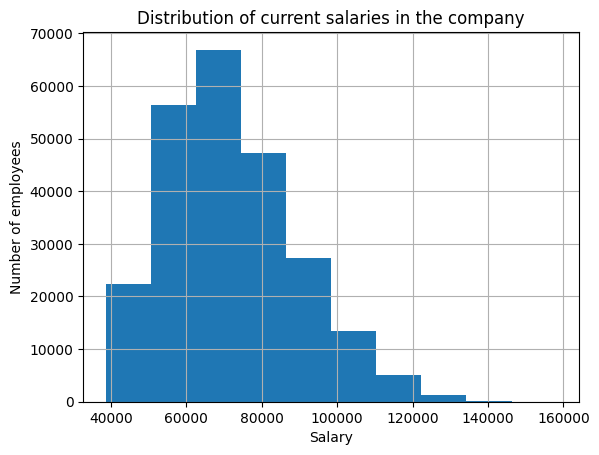

In [73]:
filter_9999.salary.plot(
    kind='hist',
    title='Distribution of current salaries in the company',
    xlabel='Salary',
    ylabel='Number of employees',
    grid="True"
);

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1j8MHLC1E0revbQLM9B0UJs6tVEgoWhmK)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [74]:
con.close()